In [71]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.tail(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [5]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [6]:
df.shape

(30, 17)

In [7]:
df.rename(columns={'W' : 'Wins','R' : 'Runs Scored','AB' : 'At Bat', 'H' : 'Hits','2B' : 'Doubles','3B' : 'Triples','HR' : 'Home Runs', 'BB' : 'Base on Balls', 'SO' : 'Strike Outs', 
                  'SB' : 'Stolen Base','RA' : 'Runs Average','ER' : 'Earned Runs','ERA' : 'Earned Run Average','CG' : 'Complete Game','SHO' : 'Shut Outs','SV' : 'Saves', 'E' : 'Errors'},
                  inplace=True)

In [8]:
df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [9]:
df['Wins'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: Wins, dtype: int64

In [10]:
df.isnull().sum()

Wins                  0
Runs Scored           0
At Bat                0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Base on Balls         0
Strike Outs           0
Stolen Base           0
Runs Average          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shut Outs             0
Saves                 0
Errors                0
dtype: int64

<Axes: >

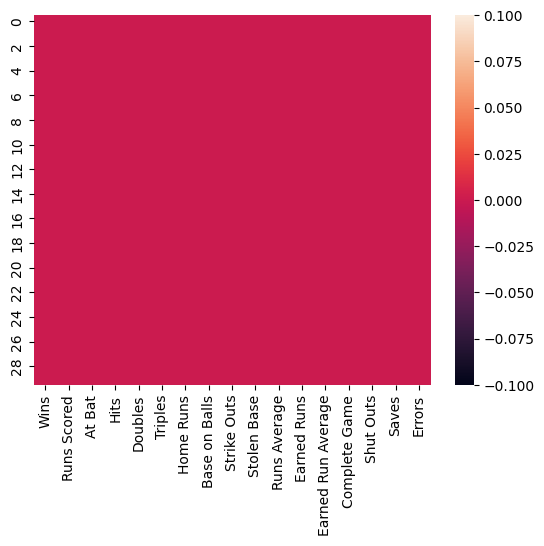

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wins,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
Runs Scored,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
At Bat,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
Hits,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
Doubles,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
Triples,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
Home Runs,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
Base on Balls,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
Strike Outs,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
Stolen Base,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


<Axes: >

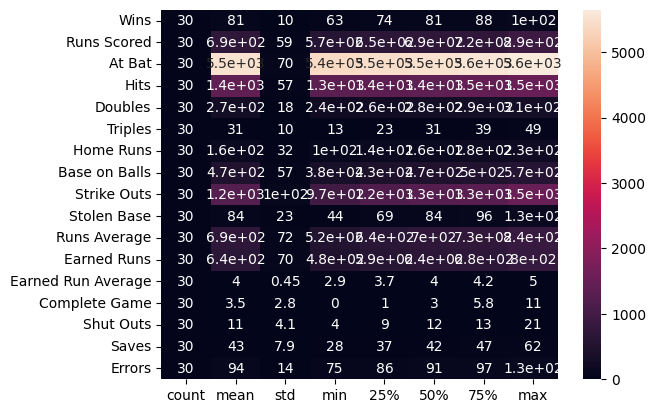

In [14]:
sns.heatmap(df.describe().T,annot=True)

In [15]:
df.corr()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs Scored,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bat,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Home Runs,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Base on Balls,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strike Outs,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Base,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<Axes: >

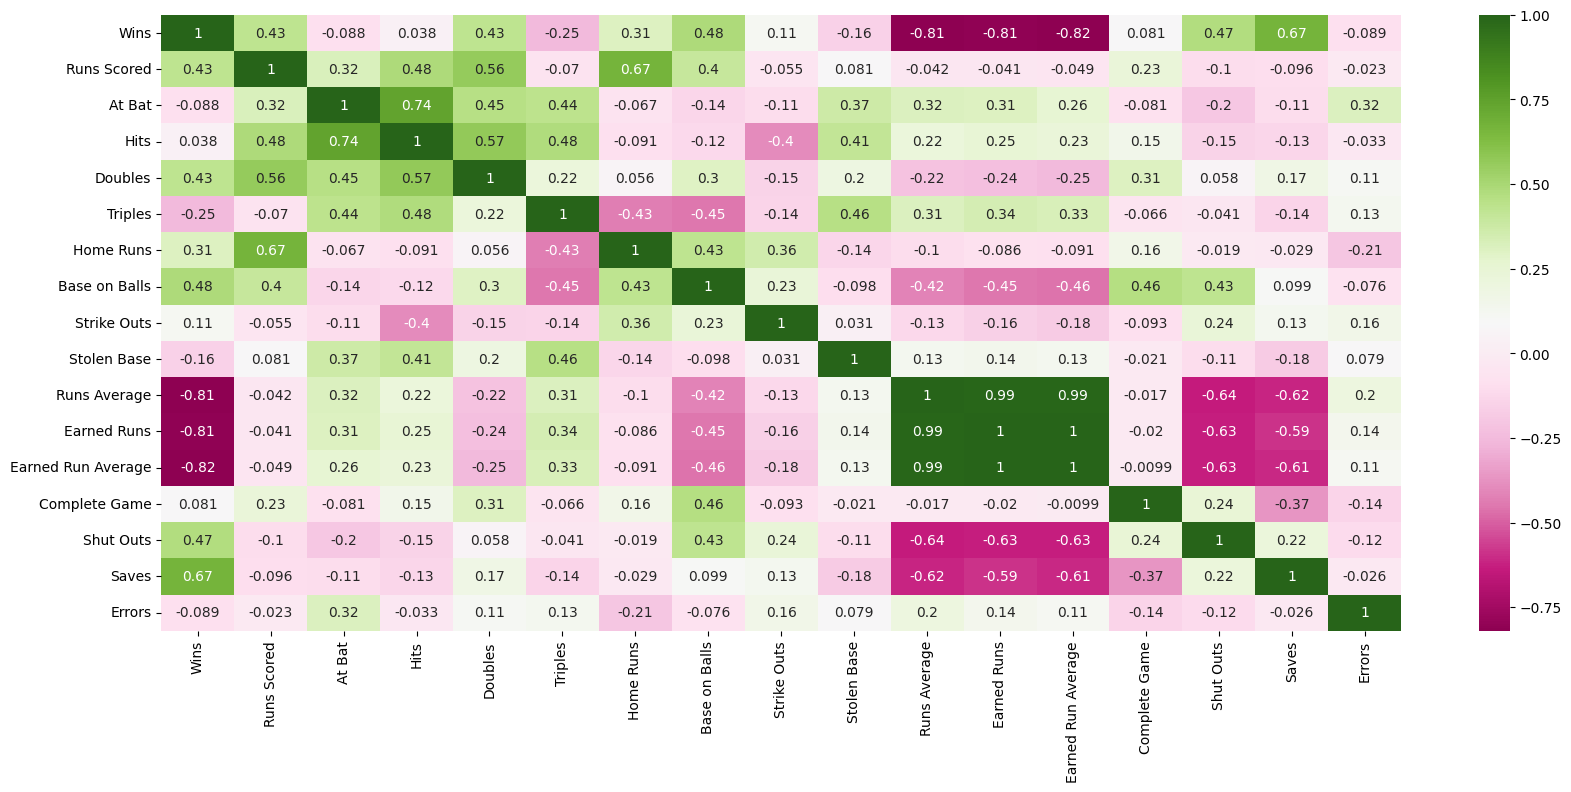

In [16]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='PiYG')

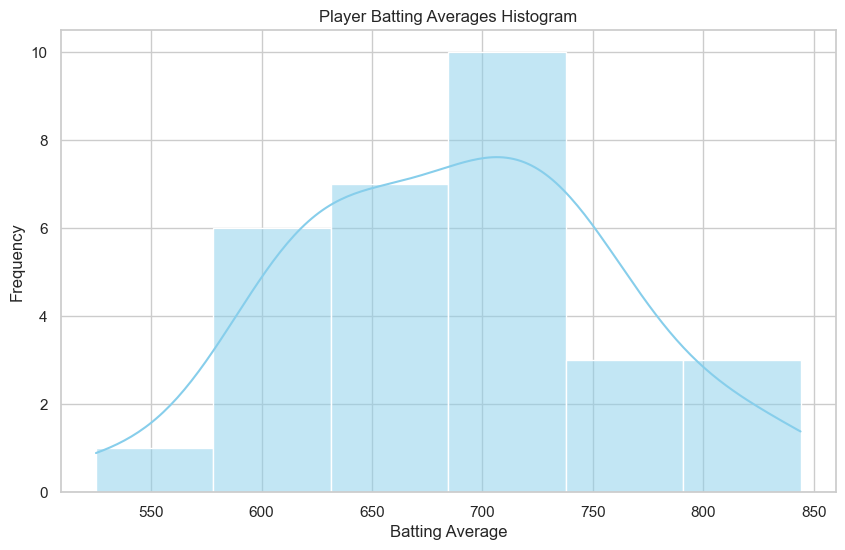

In [17]:
# Select the variable you want to visualize (e.g., player batting averages)
batting_averages = df['Runs Average']

# Create a histogram using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(batting_averages, kde=True, color='skyblue')
plt.title('Player Batting Averages Histogram')
plt.xlabel('Batting Average')
plt.ylabel('Frequency')
plt.show()

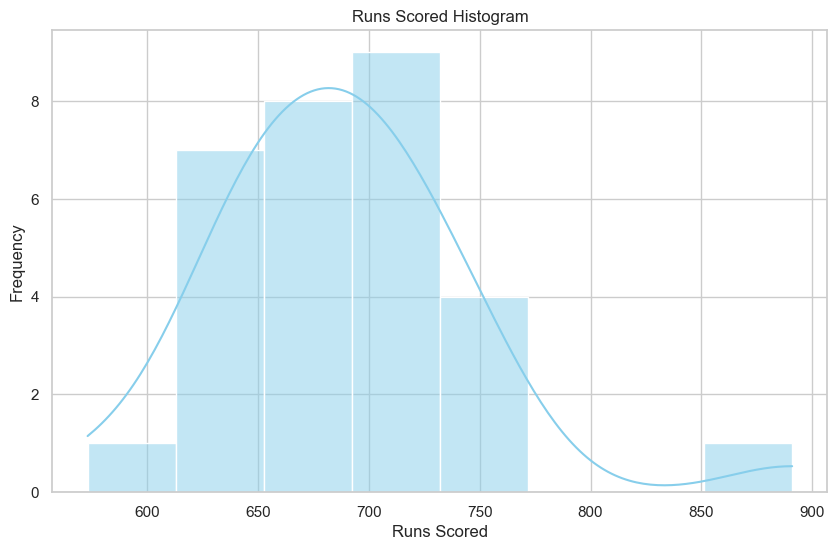

In [18]:
batting_averages = df['Runs Scored']

# Create a histogram using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(batting_averages, kde=True, color='skyblue')
plt.title('Runs Scored Histogram')
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')
plt.show()

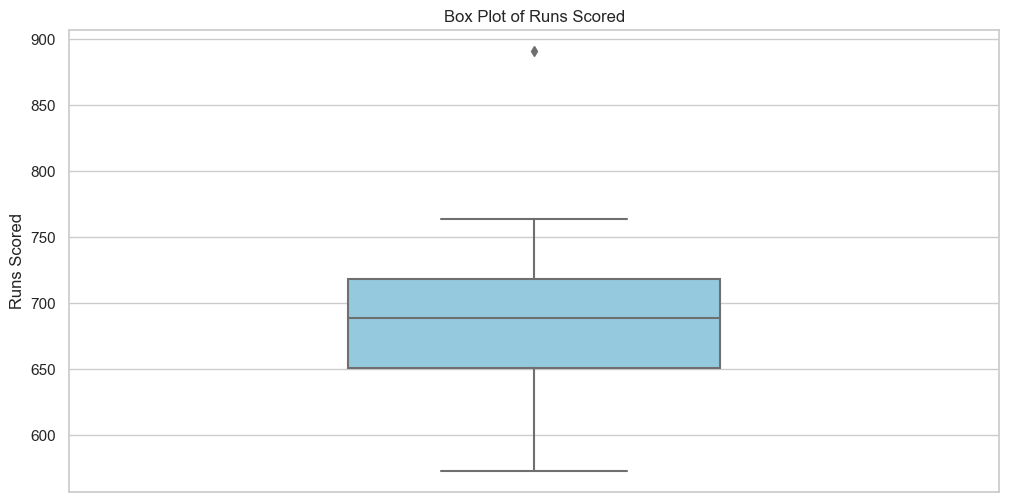

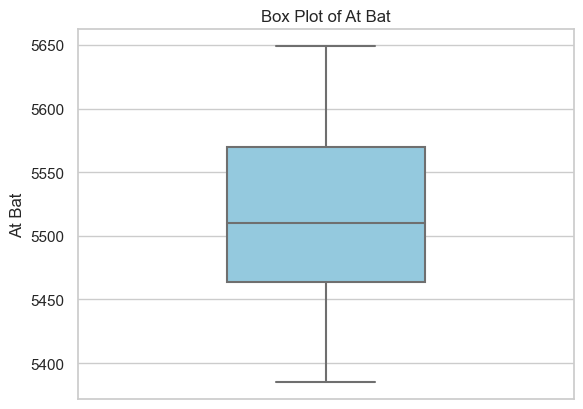

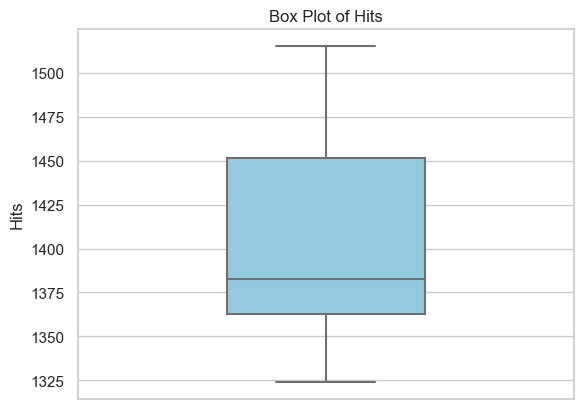

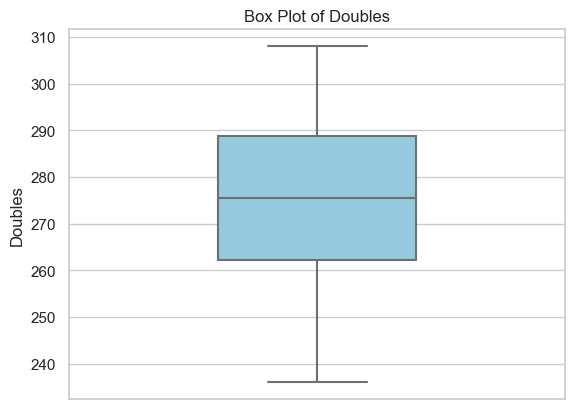

In [20]:
variables_to_plot = ['Runs Scored','At Bat','Hits','Doubles']
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

for variable in variables_to_plot:
    sns.boxplot(y=variable, data=df, color='skyblue', width=0.4)
    plt.title(f'Box Plot of {variable}')
    plt.ylabel(variable)
    plt.show()

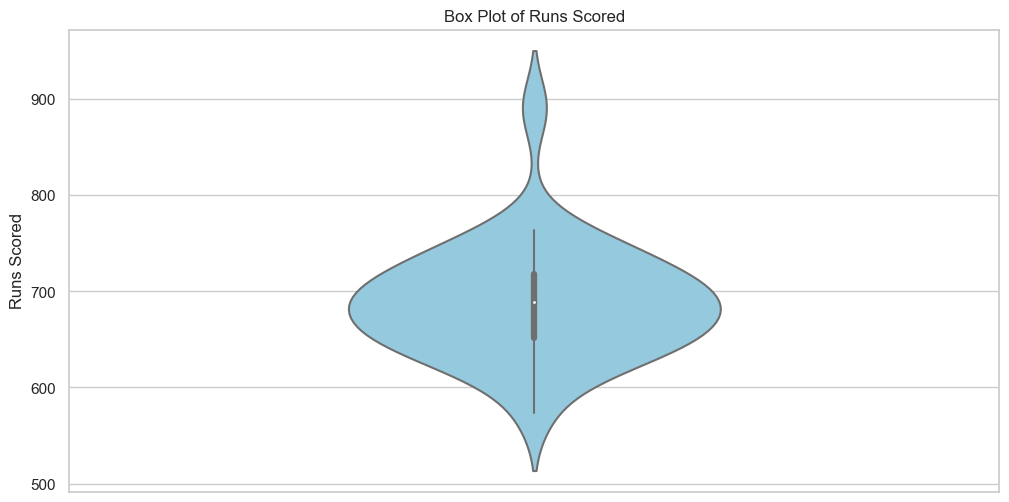

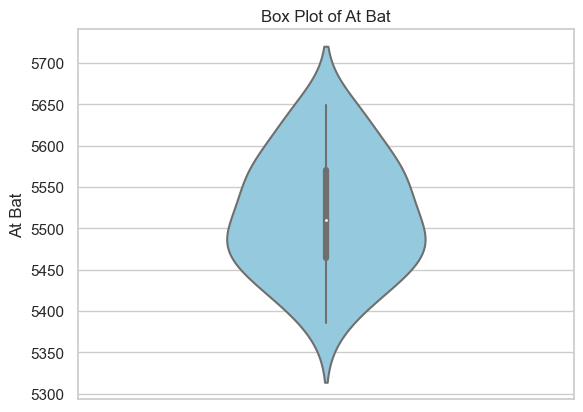

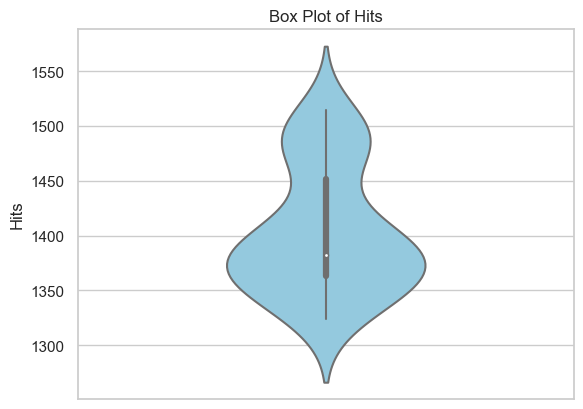

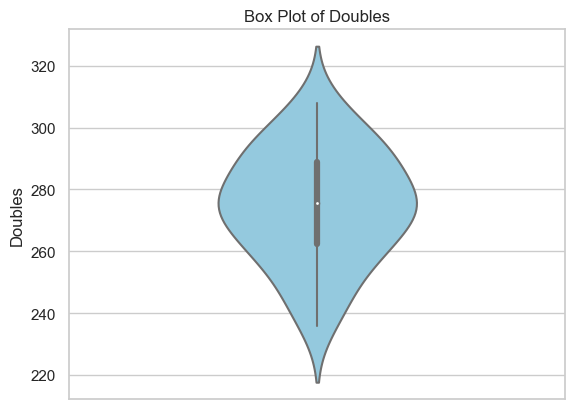

In [21]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

for variable in variables_to_plot:
    sns.violinplot(y=variable, data=df, color='skyblue', width=0.4)
    plt.title(f'Box Plot of {variable}')
    plt.ylabel(variable)
    plt.show()

<Axes: title={'center': 'Runs Scored'}>

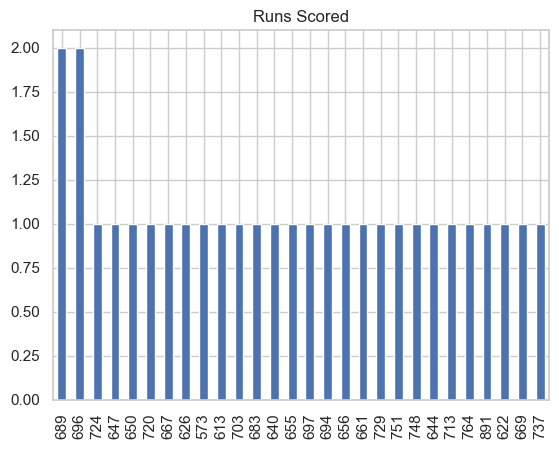

In [22]:
df['Runs Scored'].value_counts().plot.bar(title = 'Runs Scored')

<Axes: title={'center': 'Complete Game'}>

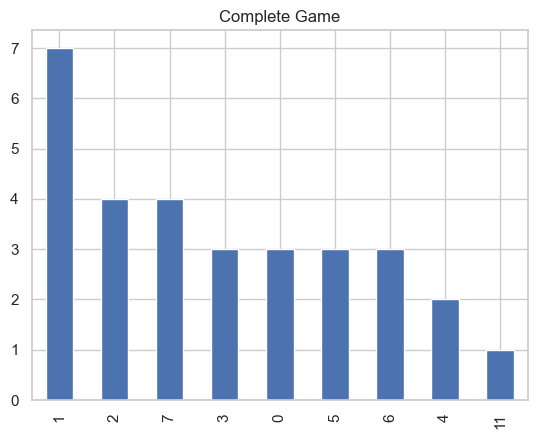

In [23]:
df['Complete Game'].value_counts().plot.bar(title = 'Complete Game')

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

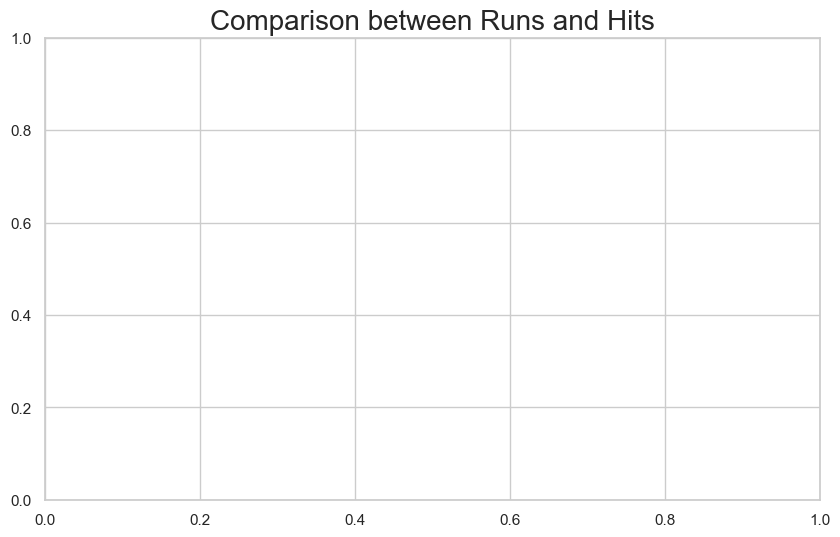

In [24]:
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Comparison between Runs and Hits',fontsize =20)
sns.scatterplot(df['Runs Scored'],df['Hits'],hue=df['Wins'])
plt.xlabel('Runs')
plt.ylabel("Hits")

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: Wins, dtype: int64


<Axes: xlabel='Wins', ylabel='count'>

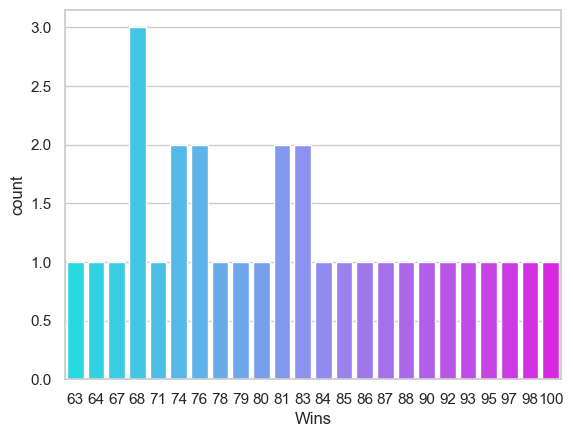

In [25]:
print(df['Wins'].value_counts())
sns.countplot(x=df['Wins'], palette = 'cool')

689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: Runs Scored, dtype: int64


<Axes: xlabel='Runs Scored', ylabel='count'>

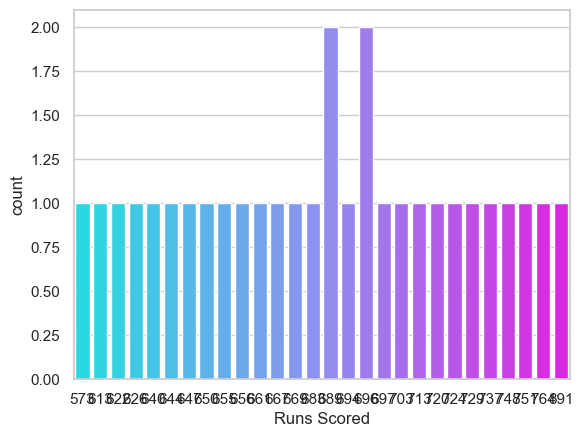

In [26]:
print(df['Runs Scored'].value_counts())
sns.countplot(x=df['Runs Scored'], palette = 'cool')

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

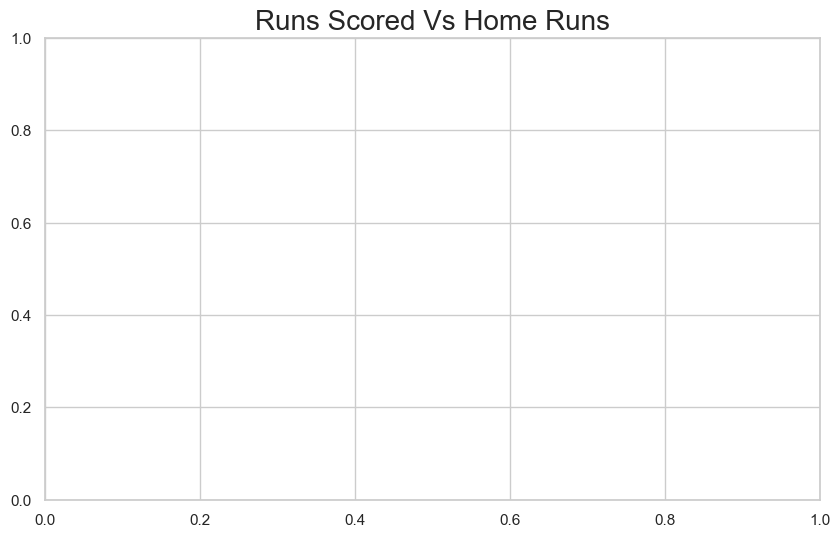

In [27]:
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Runs Scored Vs Home Runs',fontsize =20)
sns.scatterplot(df['Runs Scored'],df['Home Runs'],hue=df['Wins'])
plt.xlabel('Runs Scored',fontsize =16)
plt.ylabel('Home Runs',fontsize =16)

<Axes: title={'center': 'comparison between Runs Scored and Home Runs'}, xlabel='Runs Scored', ylabel='Home Runs'>

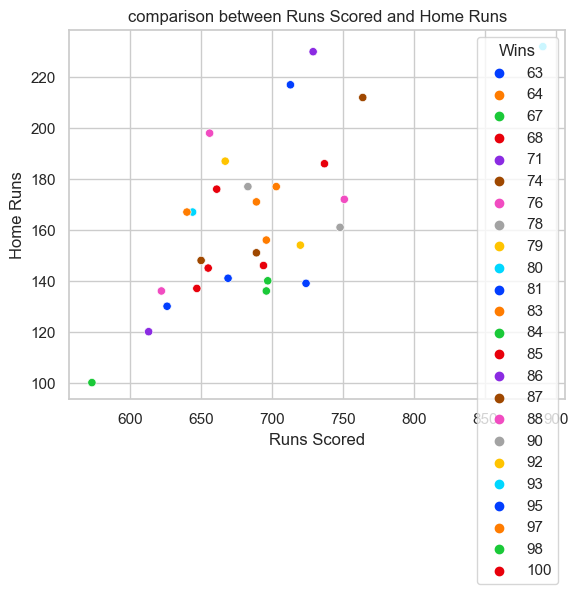

In [28]:
plt.title('comparison between Runs Scored and Home Runs')
sns.scatterplot(x = 'Runs Scored', y = 'Home Runs', data=df, hue='Wins', palette ='bright')

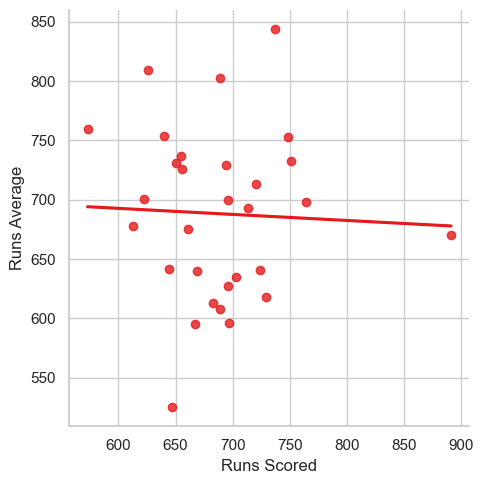

In [29]:
sns.lmplot(x = "Runs Scored",
            y = "Runs Average", 
            ci = None,
            data = df)

<Figure size 1000x1000 with 0 Axes>

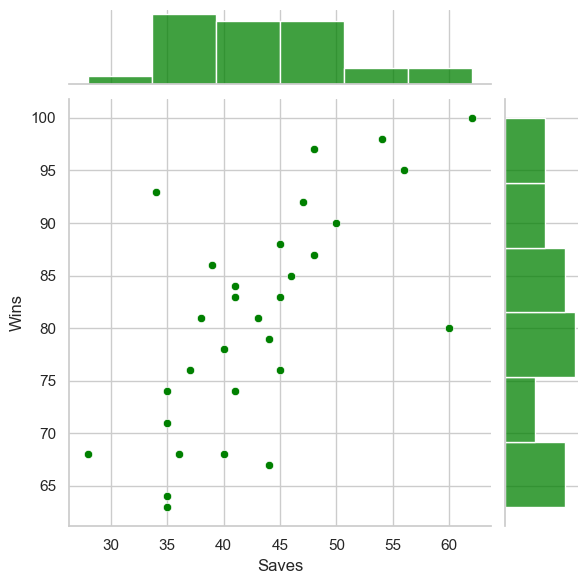

In [30]:
plt.figure(figsize=(10,10))
sns.jointplot(x="Saves", y="Wins", data=df, color="Green")

<Axes: >

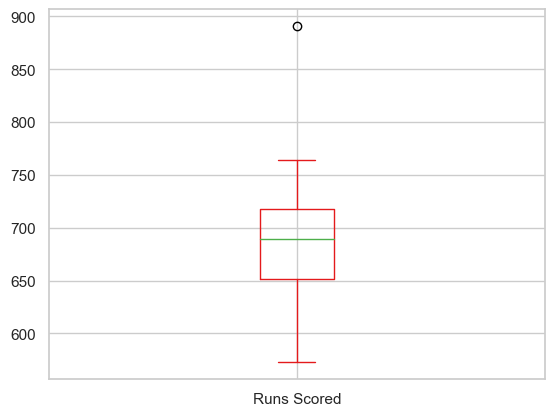

In [31]:
df['Runs Scored'].plot.box()

<Axes: >

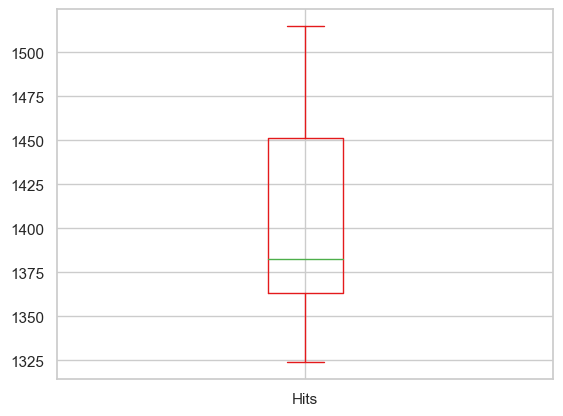

In [32]:
df['Hits'].plot.box()

<Axes: >

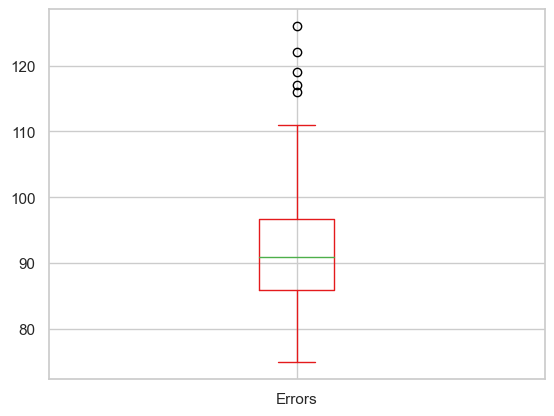

In [33]:
df['Errors'].plot.box()

Wins                      Axes(0.125,0.77;0.110714x0.11)
Runs Scored            Axes(0.257857,0.77;0.110714x0.11)
At Bat                 Axes(0.390714,0.77;0.110714x0.11)
Hits                   Axes(0.523571,0.77;0.110714x0.11)
Doubles                Axes(0.656429,0.77;0.110714x0.11)
Triples                Axes(0.789286,0.77;0.110714x0.11)
Home Runs                Axes(0.125,0.638;0.110714x0.11)
Base on Balls         Axes(0.257857,0.638;0.110714x0.11)
Strike Outs           Axes(0.390714,0.638;0.110714x0.11)
Stolen Base           Axes(0.523571,0.638;0.110714x0.11)
Runs Average          Axes(0.656429,0.638;0.110714x0.11)
Earned Runs           Axes(0.789286,0.638;0.110714x0.11)
Earned Run Average       Axes(0.125,0.506;0.110714x0.11)
Complete Game         Axes(0.257857,0.506;0.110714x0.11)
Shut Outs             Axes(0.390714,0.506;0.110714x0.11)
Saves                 Axes(0.523571,0.506;0.110714x0.11)
Errors                Axes(0.656429,0.506;0.110714x0.11)
dtype: object

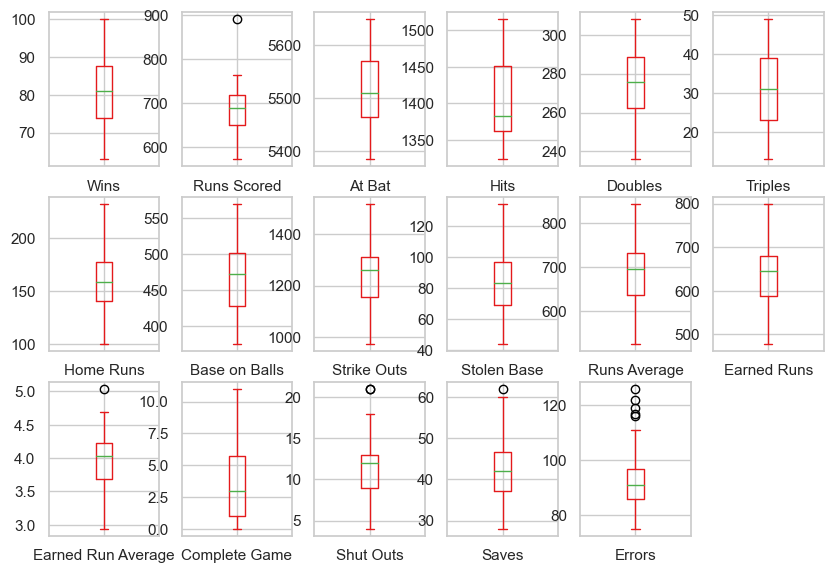

In [34]:
df.plot(kind='box',subplots=True,layout=(6,6),figsize=(10,14))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <A

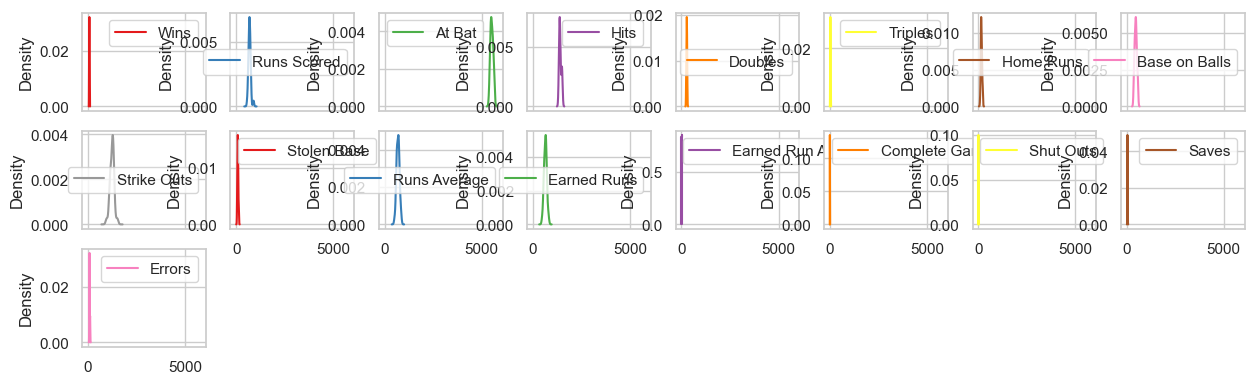

In [35]:
df.plot(kind='kde',subplots=True,layout=(8,8),figsize=(15,12))

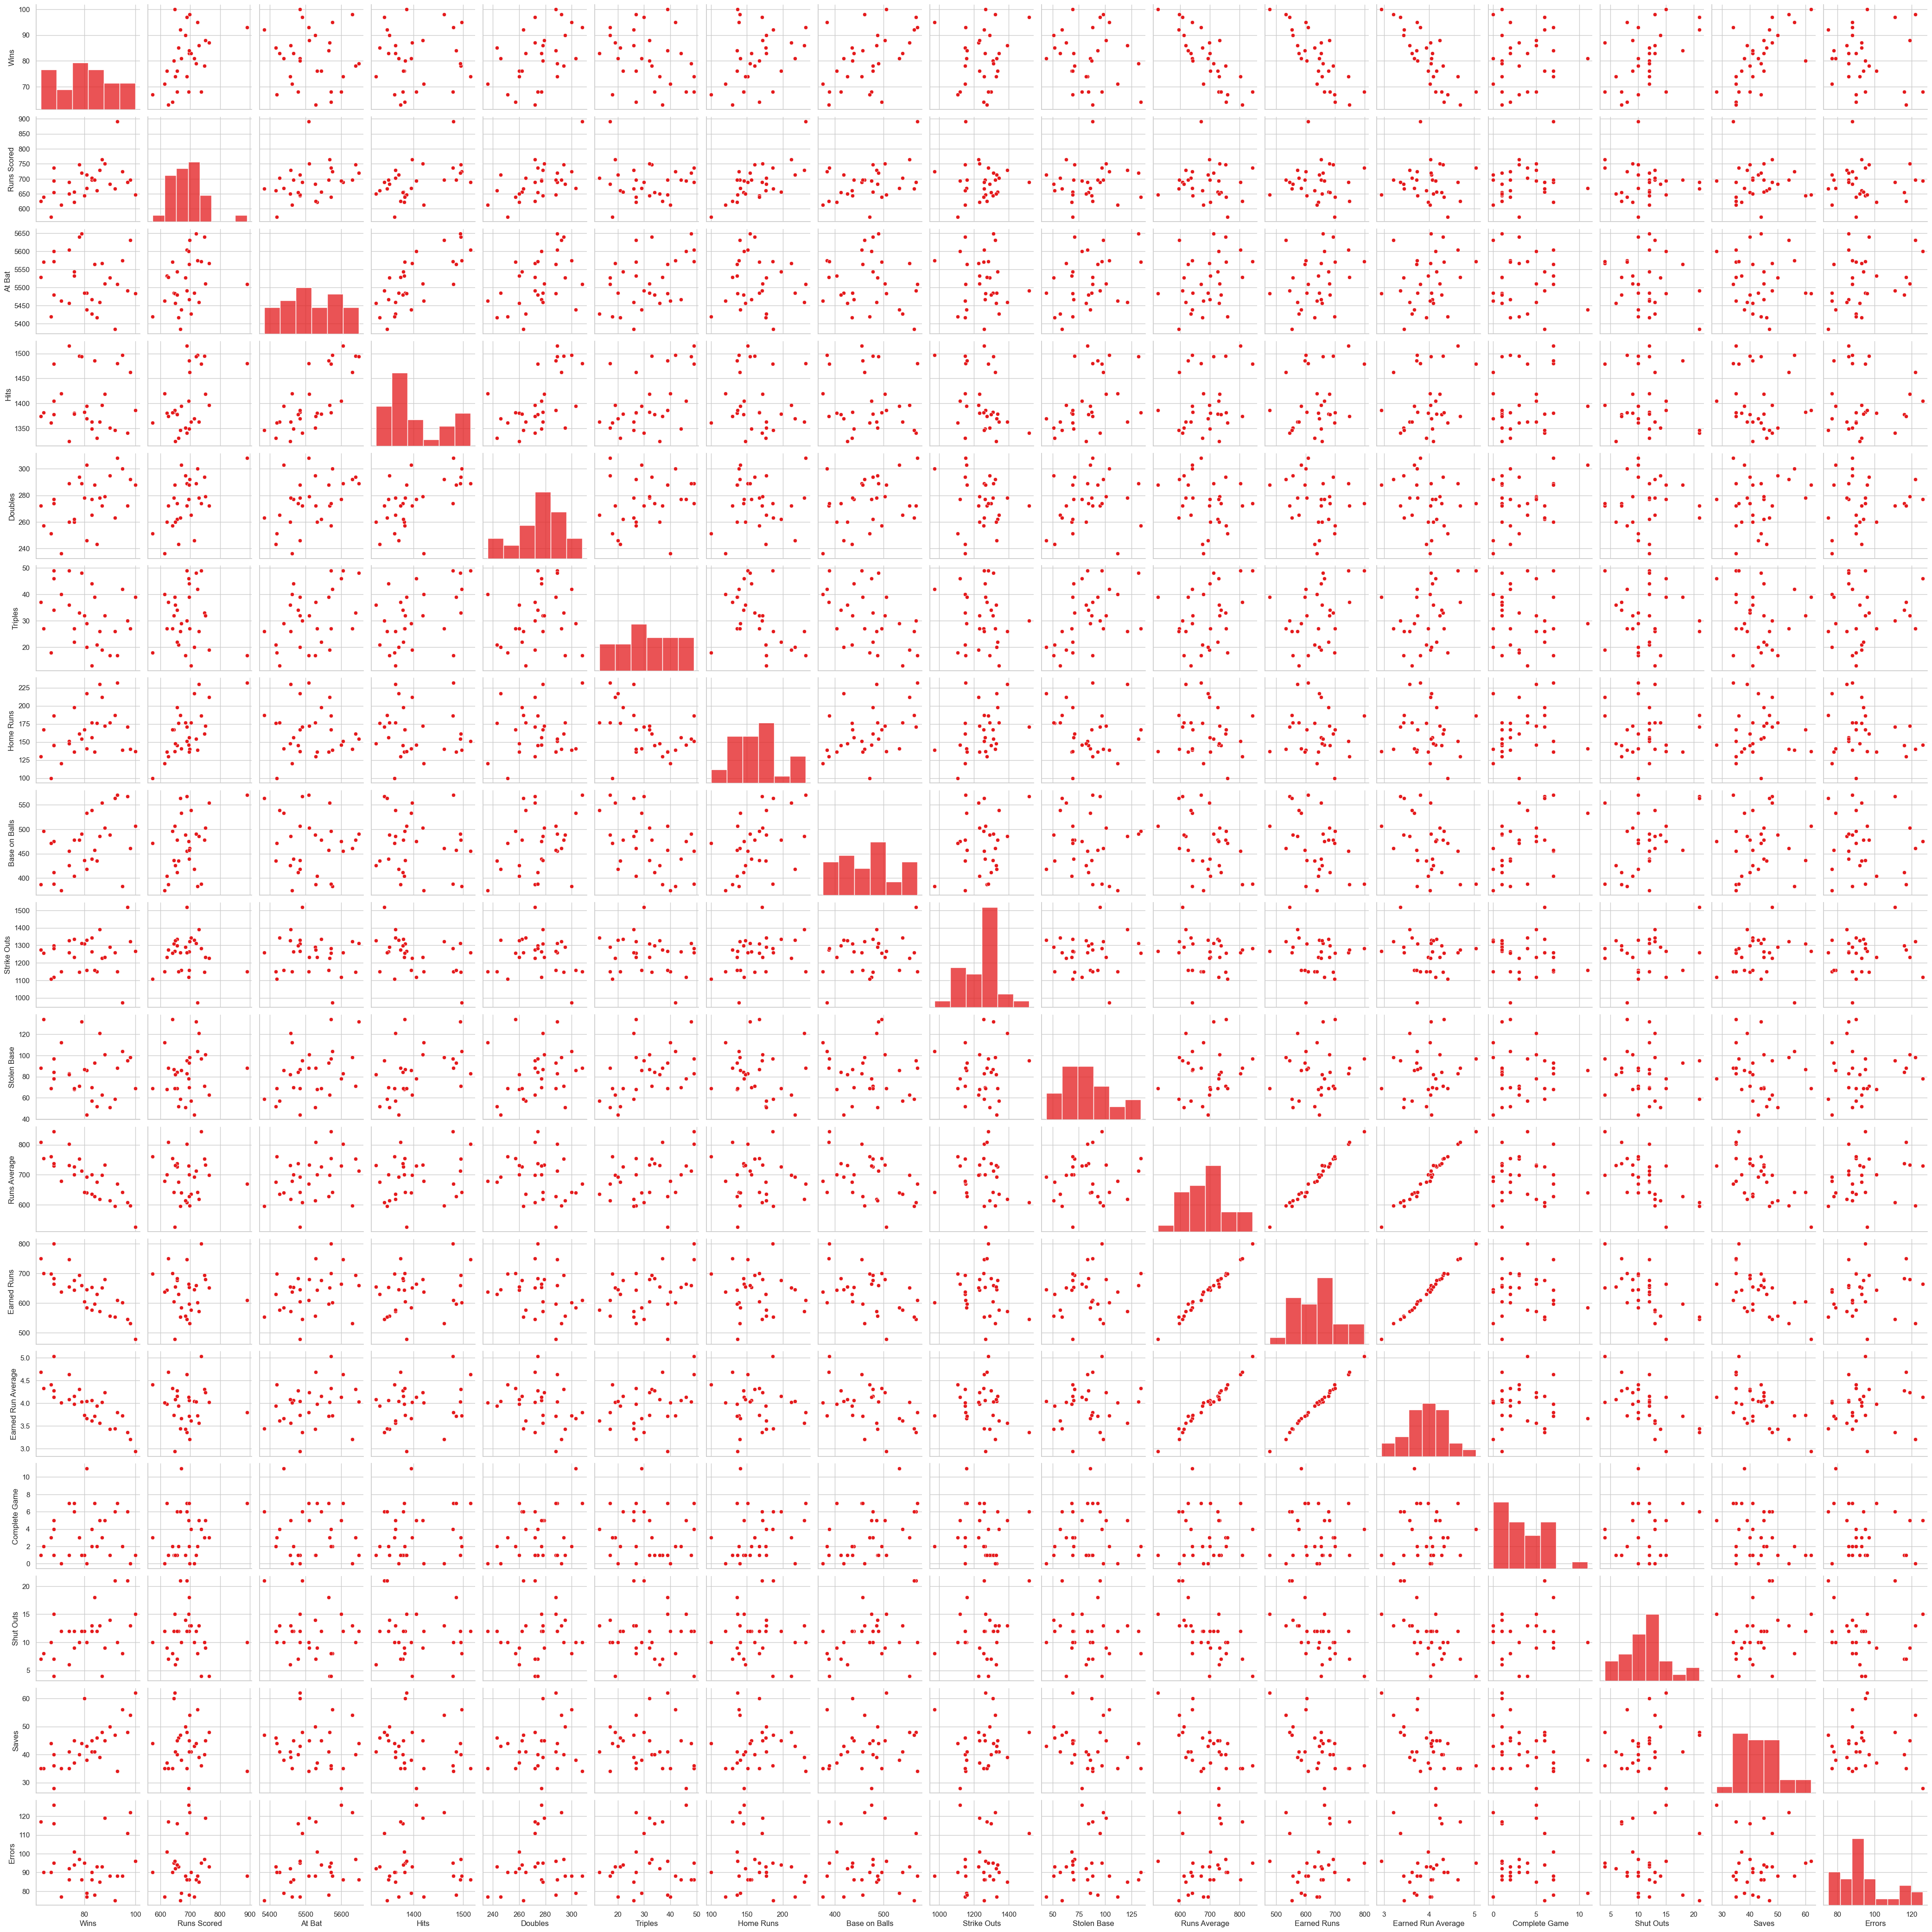

In [36]:
sns.pairplot(df)

In [37]:
df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [38]:
df.shape

(30, 17)

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Wins"] = le.fit_transform(df["Wins"])
df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,20,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,11,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,10,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,6,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,5,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [42]:
from scipy import stats

import numpy as np
z = np.abs(stats.zscore(df))
threshold=3
print(z)
df=df[(z<3).all(axis=1)]
df.shape

        Wins  Runs Scored    At Bat      Hits   Doubles   Triples  Home Runs  \
0   1.427789     0.619078  0.847731  1.663685  1.420173  1.041193   0.787299   
1   0.079876     0.134432  0.711094  0.970681  0.127403  1.235809   0.243967   
2   0.069892     0.332906  1.115233  0.151891  1.588795  0.223808   0.723377   
3   0.668964     1.146419  0.241522  0.401088  0.828122  0.418423   0.883181   
4   0.818732     0.013270  1.280738  1.984081  0.801892  1.722347   0.403770   
5   1.278021     3.509647  0.104884  1.361089  1.869832  1.391501   2.185047   
6   0.678948     1.311430  0.732263  0.116292  0.153633  1.196885   1.545833   
7   0.069892     0.428681  0.451289  0.596886  1.615025  1.099578   1.705636   
8   0.219660     0.765626  0.451289  0.365489  0.183611  0.068115   0.107601   
9   0.519196     1.034489  1.785913  1.628086  1.082929  0.165423   0.084163   
10  0.828716     1.086415  0.076017  0.275303  0.239818  0.068115   0.267405   
11  0.529180     0.705622  0.826562  0.7

(29, 17)

In [43]:
df.skew()

Wins                  0.380257
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Runs Average          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game         0.854980
Shut Outs             0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

In [46]:
x = df.drop(['Wins'], axis =1)
y = df['Wins']

In [47]:
from sklearn.preprocessing import power_transform
df = power_transform(x)
df = pd.DataFrame(df, columns=x.columns)
df.skew()

Runs Scored          -0.024842
At Bat                0.081092
Hits                  0.000000
Doubles              -0.052793
Triples              -0.075139
Home Runs             0.000448
Base on Balls        -0.008572
Strike Outs           0.051530
Stolen Base          -0.009570
Runs Average         -0.011974
Earned Runs          -0.004988
Earned Run Average   -0.000401
Complete Game        -0.045947
Shut Outs             0.000529
Saves                -0.000925
Errors                0.065585
dtype: float64

In [48]:
df.corr()

,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
Runs Scored,1.000000,0.436811,0.441101,0.445578,0.114928,0.601316,0.256226,0.071357,0.061189,0.004057,0.025590,0.009312,0.154121,-0.135749,0.081630,0.043300
At Bat,0.436811,1.000000,0.768613,0.482456,0.440948,-0.030936,-0.134326,-0.106421,0.379312,0.316895,0.311135,0.257121,-0.061024,-0.202180,-0.148369,0.338007
Hits,0.441101,0.768613,1.000000,0.546139,0.558329,-0.204440,-0.205464,-0.378970,0.449594,0.228516,0.264389,0.240793,0.064183,-0.132921,-0.113963,0.001090
Doubles,0.445578,0.482456,0.546139,1.000000,0.339499,-0.082897,0.200778,-0.130878,0.234345,-0.232180,-0.239968,-0.261269,0.208298,0.091043,0.244839,0.115566
Triples,0.114928,0.440948,0.558329,0.339499,1.000000,-0.336874,-0.407378,-0.192467,0.543289,0.299402,0.321161,0.313397,-0.005419,-0.063086,-0.261047,0.088634
Home Runs,0.601316,-0.030936,-0.204440,-0.082897,-0.336874,1.000000,0.342580,0.487945,-0.219285,-0.095334,-0.066766,-0.078316,0.125121,-0.012902,0.111649,-0.139022
Base on Balls,0.256226,-0.134326,-0.205464,0.200778,-0.407378,0.342580,1.000000,0.316746,-0.132235,-0.421388,-0.452953,-0.463834,0.443071,0.444762,0.208390,-0.050162
Strike Outs,0.071357,-0.106421,-0.378970,-0.130878,-0.192467,0.487945,0.316746,1.000000,0.029353,-0.155158,-0.192778,-0.209969,-0.057091,0.216725,0.137184,0.169464
Stolen Base,0.061189,0.379312,0.449594,0.234345,0.543289,-0.219285,-0.132235,0.029353,1.000000,0.149021,0.158362,0.141724,0.005011,-0.107246,-0.198194,0.125042
Runs Average,0.004057,0.316895,0.228516,-0.232180,0.299402,-0.095334,-0.421388,-0.155158,0.149021,1.000000,0.991259,0.986727,0.062530,-0.642785,-0.626823,0.229861


<Axes: >

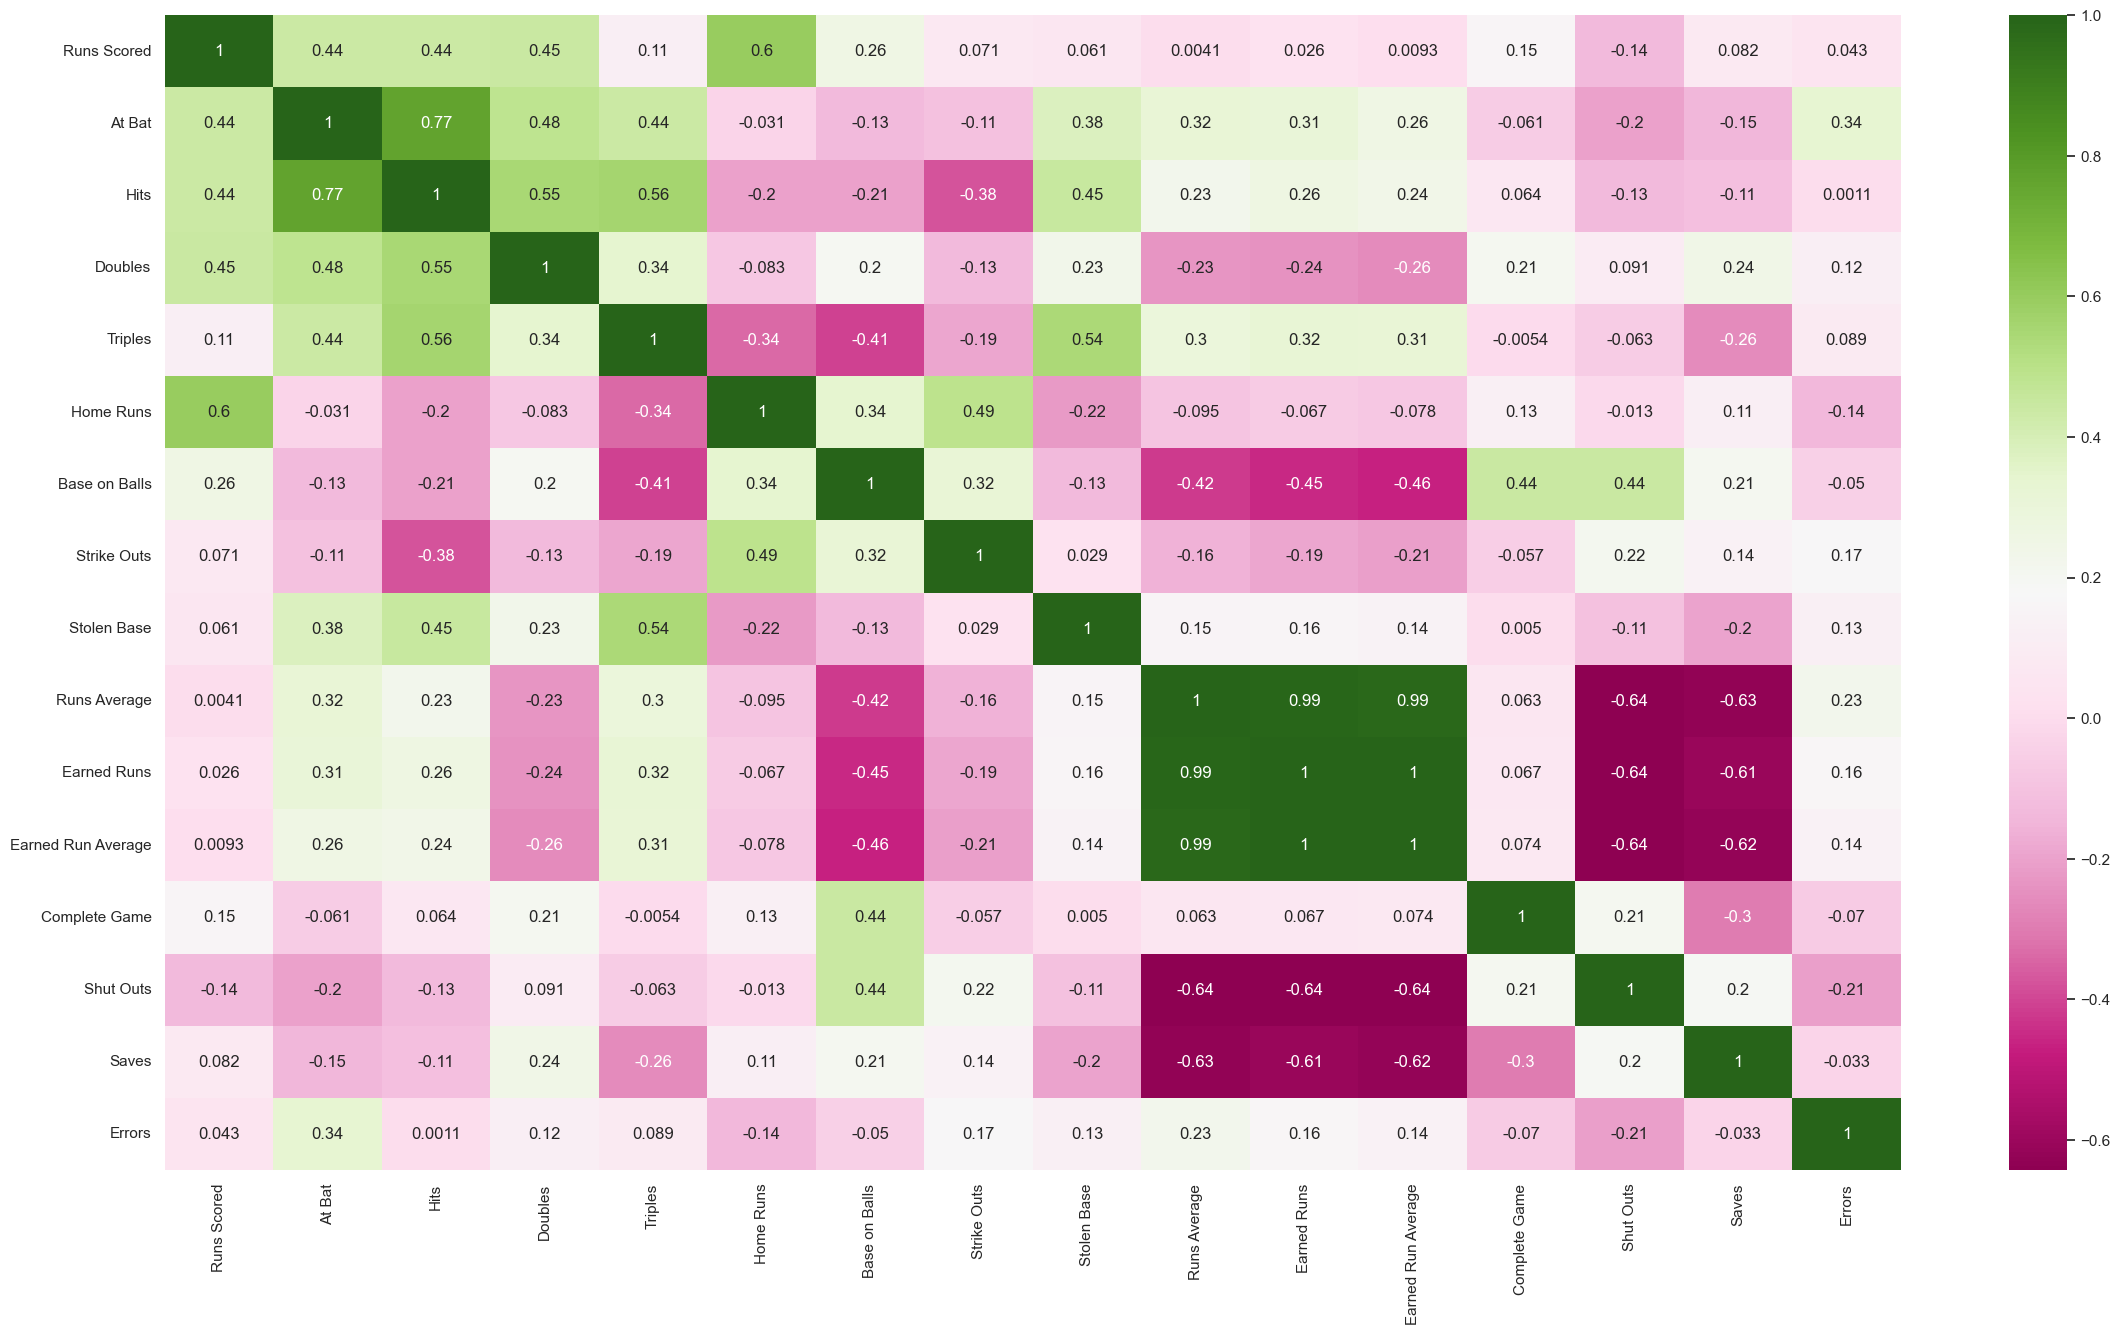

In [49]:
plt.figure(figsize = (28,15))
sns.heatmap(df.corr(),annot=True,cmap='PiYG')

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,6.203862,Runs Scored
1,11.822743,At Bat
2,8.894721,Hits
3,3.501608,Doubles
4,3.010176,Triples
5,7.782532,Home Runs
6,3.304538,Base on Balls
7,2.987134,Strike Outs
8,2.082265,Stolen Base
9,221.601838,Runs Average


In [52]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=217, test_size=.25)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [11.10578844 13.44757665  8.2103271  -9.63983391 21.91768501 -4.19581039
 13.06317266 -2.32402014]


Actual Wins:
 2     10
16    22
27     8
24     0
6     15
4      5
7     10
18     3
Name: Wins, dtype: int64


In [72]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 5.501132625376503
Mean squared error : 42.185357551810775
Root Mean Squared Error: 6.495025600550838


 R2 Score :
0.009951271244631577


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso

In [80]:
rf = RandomForestRegressor(n_estimators = 250 ,max_depth=6)
svr=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
dtc = DecisionTreeRegressor(criterion='mse')
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor( max_depth=6,learning_rate=0.1)
knn=KNeighborsRegressor(n_neighbors=4,algorithm='kd_tree')
model = [rf,svr,dtc,adb,gradb,knn]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    
    # Cross Validation
    score = cross_val_score(m, X, Y, cv =4)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())



 Error of  RandomForestRegressor(max_depth=6, n_estimators=250) :
Mean absolute error : 2.3605333333333336
Mean squared error : 7.109453355555558
Root Mean Squared Error: 2.666355819382619


 R2 Score :
0.8331481427372367


Cross Validation Score : RandomForestRegressor(max_depth=6, n_estimators=250) :

Mean CV Score : 0.5623833993940761


 Error of  SVR(epsilon=0.2, gamma='auto', kernel='poly') :
Mean absolute error : 4.437773720651922
Mean squared error : 28.41533888942105
Root Mean Squared Error: 5.3306039891761845


 R2 Score :
0.33312002606419244


Cross Validation Score : SVR(epsilon=0.2, gamma='auto', kernel='poly') :

Mean CV Score : -0.2252853594260431


InvalidParameterError: The 'criterion' parameter of DecisionTreeRegressor must be a str among {'absolute_error', 'squared_error', 'poisson', 'friedman_mse'}. Got 'mse' instead.